In [1]:
## Goal: Explore data w/ visualizations for Adventure Works dataset
      #    for purpose of Classification Supervised ML w/ label= AveMonthSpend

# Import Python pkgs pandas, numpy, matplotlib.pyplot, & seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.random as nr
import math
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import scipy.stats as ss

%matplotlib inline  
# Start of magic command which configures execution environment, to display graphics w/in notebook

In [2]:
# Load already prepared dataset, display shape, & explore first 10 rows of Pandas data frame

AW_Custs_R = pd.read_csv('AW_Custs_R_Preped.csv', header=0)
print(AW_Custs_R.shape)
AW_Custs_R.head(5)

(16404, 25)


,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,...,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age,AveMonthSpend,BikeBuyer,AgeGroup,log_AveMonthSpend,log_Age,log_YearlyIncome
0,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,4/8/1966,Bachelors,...,0,2,137947,31,89,0,25-45,4.488636,3.433987,11.834625
1,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,5/14/1965,Bachelors,...,3,3,101141,32,117,1,25-45,4.762174,3.465736,11.524271
2,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,8/12/1965,Bachelors,...,3,3,91945,32,123,0,25-45,4.812184,3.465736,11.428946
3,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,2/15/1968,Bachelors,...,0,0,86688,29,50,0,25-45,3.912023,3.367296,11.370071
4,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,8/8/1968,Bachelors,...,5,5,92771,29,95,1,25-45,4.553877,3.367296,11.437889


In [3]:
# Testing for Class Imbalance by Examining Classes where label= BikeBuyer
 # Unequal numbers of cases for the categories of labels, which can seriously bias the training of classifier alogrithms 
 #  higher error rate for the minority class. This should be tested for before training any model.   

AW_Custs_R_counts =  AW_Custs_R['AveMonthSpend'].value_counts()
print(AW_Custs_R_counts) 

48     386
52     378
51     367
47     364
50     361
49     359
46     334
53     333
54     332
45     312
76     304
75     298
77     290
43     289
55     275
73     270
74     265
68     264
72     262
79     262
56     261
70     259
78     254
57     252
66     250
71     249
44     242
69     235
65     234
64     234
      ... 
124     19
132     19
120     19
128     17
167     17
158     17
33      16
144     16
162     15
159     14
163     14
32      13
169     13
161     12
166     12
164     11
170      7
171      6
29       5
31       5
172      4
173      4
26       3
30       3
25       2
176      2
174      2
175      2
24       1
22       1
Name: AveMonthSpend, Length: 152, dtype: int64


In [4]:
#Above- Knowing imbalance exists, the best accuracy we can get w/out creating a ML model is 70%.
 # This is achieved by guessing all customers will buy a bike
    
#Below- Create a numpy array of label values

labels = np.array(AW_Custs_R['AveMonthSpend'])
log_labels = np.array(AW_Custs_R['log_AveMonthSpend'])

In [5]:
#Create a numpy array with all of the features (Model Matrix)
 # Encode categorical string variables into integers. 
 # Transform integer coded variables to dummy variables.
 # Append each dummy coded categorical variable to model matrix.
    
def encode_string(cat_features):
    enc = preprocessing.LabelEncoder()  # Encode strings to numeric categories
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    
    ohe = preprocessing.OneHotEncoder()  #Apply One Hot Encoder
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ['Education', 'Gender', 'MaritalStatus', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren']

Features = encode_string(AW_Custs_R['Occupation'])
for col in categorical_columns:
    temp = encode_string(AW_Custs_R[col])
    Features = np.concatenate([Features, temp], axis = 1)
    
print(Features.shape)
print(Features[:2, :])

(16404, 31)
[[0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 1. 0. 0.]]


In [6]:
# 6 categorical variables were converted into 31 dummy variables. 

# Append numeric features to model matrix

Norm_Features = np.concatenate([Features, np.array(AW_Custs_R[['YearlyIncome', 'Age']])], axis = 1)

print(Norm_Features.shape)
print(Norm_Features[:2, :])

(16404, 33)
[[0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
  1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 1.37947e+05 3.10000e+01]
 [0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
  0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 1.01141e+05 3.20000e+01]]


In [7]:
# 2 numerical variables appended to matrix

#Below- How many dummy variables came from checking_account_status? -5-
print(AW_Custs_R['Occupation'].unique())

['Professional' 'Management' 'Skilled Manual' 'Clerical' 'Manual']


In [35]:
## Normal Features w/ Log of Label
 #Create randomly sampled log-y training & test data (Bernoulli sample) sets from sklearn.model_selection

nr.seed(9988)  #set seed
indx = range(Norm_Features.shape[0])
indx = ms.train_test_split(indx, test_size = 5000)
x_train = Norm_Features[indx[0], :]
logy_train = np.ravel(log_labels[indx[0]])
x_test = Norm_Features[indx[1], :]
logy_test = np.ravel(log_labels[indx[1]])
print(x_test)

[[0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 1.16437e+05
  3.10000e+01]
 [0.00000e+00 0.00000e+00 1.00000e+00 ... 0.00000e+00 1.71310e+04
  3.20000e+01]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 8.72200e+04
  2.40000e+01]
 ...
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 9.82510e+04
  2.50000e+01]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 6.80260e+04
  3.70000e+01]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 4.32170e+04
  4.20000e+01]]


In [36]:
# Need to rescale the numeric features so they don't carry a larger influence on 
 #the model using scikit learn to Zscore numeric features first on training then test data set

scaler = preprocessing.StandardScaler().fit(x_train[:, 31:])
x_train[:, 31:] = scaler.transform(x_train[:, 31:])
x_test[:, 31:] = scaler.transform(x_test[:, 31:])
x_test[:5, :]

array([[ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.96535834, -0.39702732],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        , -1.53549364, -0.30780453],
       [ 0.        ,  0.    

In [11]:
# Make the linear regression model using sklearn import linear_model

lin_mod2 = linear_model.LinearRegression(fit_intercept = False)  #intercept will be accomidated in coefficients of dummy variables
lin_mod2.fit(x_train, logy_train)  #fit the model w/ numpy array of features & label

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [12]:
#Examine intercept and coefficients of training data

print(lin_mod2.intercept_)
print(lin_mod2.coef_)

0.0
[ 5.46613018e+11  5.46613018e+11  5.46613018e+11  5.46613018e+11
  5.46613018e+11  3.09734995e+11  3.09734995e+11  3.09734995e+11
  3.09734995e+11  3.09734995e+11  5.90363307e+11  5.90363307e+11
 -6.98002353e+11 -6.98002353e+11 -1.11139291e+11 -1.11139291e+11
 -1.11139291e+11 -1.11139291e+11 -1.11139291e+11 -3.91886799e+11
 -3.91886799e+11 -3.91886799e+11 -3.91886799e+11 -3.91886799e+11
 -3.91886799e+11 -2.45682877e+11 -2.45682877e+11 -2.45682877e+11
 -2.45682877e+11 -2.45682877e+11 -2.45682877e+11  9.88769531e-02
 -3.22875977e-02]


In [15]:
#Above- Intercept is 0.0. Dummy variables are in similiar range, indicating bias/intercept has been
 # incorporated in them. Numerical values increase for first variable but weakly decrease for second.
    
#Below- Evaluate performance of model using test data set by computing performance metrics

def print_metrics2(y_true, y_predicted, n_parameters):
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters -1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    
y_score2 = lin_mod2.predict(x_test)
print_metrics2(logy_test, y_score2, 28)

Mean Square Error      = 0.003523475733716043
Root Mean Square Error = 0.059358872409405176
Mean Absolute Error    = 0.0452751308072435
Median Absolute Error  = 0.03615359655672323
R^2                    = 0.9704616681429882
Adjusted R^2           = 0.970301262881496


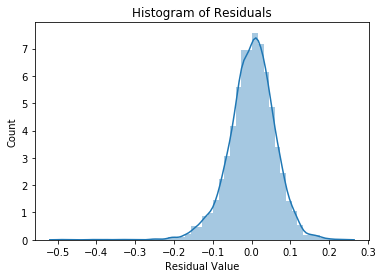

In [16]:
#Above- RMSE, MAE, Median absolute error are small & in similiar range. 
 # R^2 & R^2adj are barely different, indicating model may not be overfit & might generalize well.
    
def hist_resids2(logy_test, y_score2):
    resids = np.subtract(logy_test.reshape(-1,1), y_score2.reshape(-1,1))  #compute vector of residuals
    sns.distplot(resids)
    plt.title('Histogram of Residuals')
    plt.xlabel('Residual Value')
    plt.ylabel('Count')
    
hist_resids2(logy_test, y_score2)

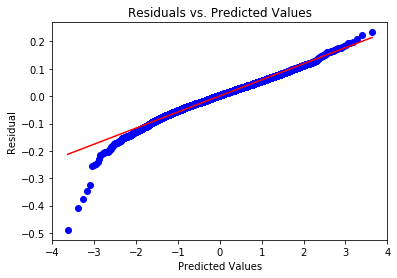

In [17]:
#Above- Residuals are large in range, but noticably Gaussian in distribution

#Below- Examine Q-Q normal plot

def resid_qq2(logy_test, y_score2):
    resids = np.subtract(logy_test.reshape(-1,1), y_score2.reshape(-1,1))  #compute vector of residuals
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residual')
    
resid_qq2(logy_test, y_score2)

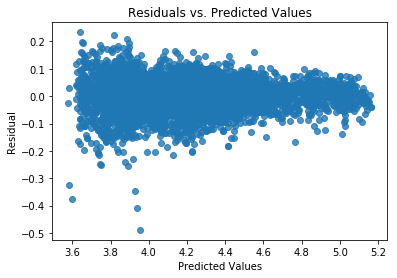

In [18]:
#Above- close to normally distributed with large residuals deviating from line (skew)

#Below- Display plot of residuals vs. predicted values

def resid_plot2(logy_test, y_score2):
    resids = np.subtract(logy_test.reshape(-1,1), y_score2.reshape(-1,1))   #comput vector of residuals
    sns.regplot(y_score2, resids, fit_reg = False)
    plt.title('Residuals vs. Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residual')
    
resid_plot2(logy_test, y_score2)

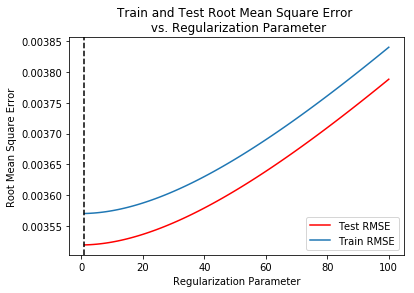

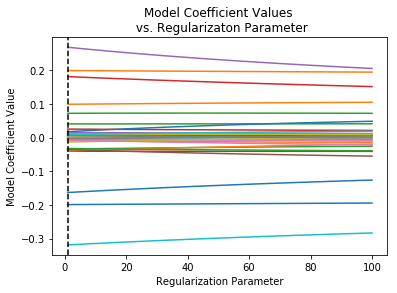

(1, 0.003518871095485767)


In [19]:
#Above- 

#Below- l2 regularization (Ridge Regression) applies a pentalty proportional to the l2 or Eucldian norm of model weights to loss function.
 # Which is SSE + regularization term = loss function for linear regression using squared error as metric
 #l2 is a soft constraint, meaning coefficients are driven close to, but likely not exactly to 0
 # Measures distance 'as the corw flies'


def plot_regularization(l, train_RMSE, test_RMSE, coefs, min_idx, title):   #Make plot of RMSE vs regularization parameter
    plt.plot(l, test_RMSE, color = 'red', label = 'Test RMSE')
    plt.plot(l, train_RMSE, label = 'Train RMSE')    
    plt.axvline(min_idx, color = 'black', linestyle = '--')
    plt.legend()
    plt.xlabel('Regularization Parameter')
    plt.ylabel('Root Mean Square Error')
    plt.title(title)
    plt.show()
    
    plt.plot(l, coefs)  #Make plot of values of regression coefficients vs regularization parameter
    plt.axvline(min_idx, color = 'black', linestyle = '--')
    plt.title('Model Coefficient Values \n vs. Regularizaton Parameter')
    plt.xlabel('Regularization Parameter')
    plt.ylabel('Model Coefficient Value')
    plt.show()

def test_regularization_l2(x_train, logy_train, x_test, logy_test, l2):
    train_RMSE = []
    test_RMSE = []
    coefs = []
    for reg in l2:  #Loops of l2 grid/list, each time computing a penalized l2 reg model & RMSE then saving to a list
        lin_mod = linear_model.Ridge(alpha = reg)  #define l2 regularized linear reg model from scikit-learn Linear_model package
        lin_mod.fit(x_train, logy_train)
        coefs.append(lin_mod.coef_)
        y_score_train = lin_mod.predict(x_train)
        train_RMSE.append(sklm.mean_squared_error(logy_train, y_score_train))
        y_score = lin_mod.predict(x_test)
        test_RMSE.append(sklm.mean_squared_error(logy_test, y_score))  #lowest RMSE value of regularlization parameter is saved 
    min_idx = np.argmin(test_RMSE)
    min_l2 = l2[min_idx]
    min_RMSE = test_RMSE[min_idx]
    
    title = 'Train and Test Root Mean Square Error \n vs. Regularization Parameter'
    plot_regularization(l2, train_RMSE, test_RMSE, coefs, min_l2, title)
    return min_l2, min_RMSE
     
l2 = [x for x in range(1,101)]  #grid of ~100 l2 penalty parameters created
out_l2 = test_regularization_l2(x_train, logy_train, x_test, logy_test, l2) 
print(out_l2)  #print x value where test RMSE is at min and what min value is

Mean Square Error      = 0.003518871095485767
Root Mean Square Error = 0.05932007329299052
Mean Absolute Error    = 0.04517448504832383
Median Absolute Error  = 0.036061066019997146
R^2                    = 0.9705002701775717
Adjusted R^2           = 0.9703400745409656


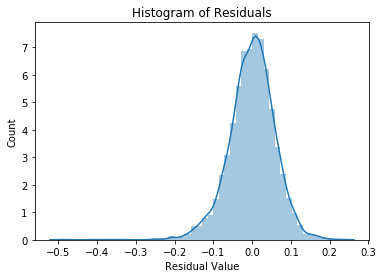

In [25]:
#Above- In top plot, point w/ lowest RMSE is shown w/ dotted line at 1.0. Min variance dominates bias to left of dotted line
 # & min bias dominates variance to right of dotted line. As bias grows, RMSE also changes dramatically. Smooth curve.
 # In bottom plot, there is high variance & bias(regularization penalty) is small to left of dotted line. Variance decreases as 
 # lines cluster & higher bias is introduced tot he right od dotted line.
    
#Below- Evaluate the Ridge regression model by computing w/ training data and showing results for test data.

lin_mod_l2 = linear_model.Ridge(alpha = out_l2[0])
lin_mod_l2.fit(x_train, logy_train)
y_score_l2 = lin_mod_l2.predict(x_test)

print_metrics2(logy_test, y_score_l2, 28)
hist_resids2(logy_test, y_score_l2)
#resid_qq2(logy_test, y_score_l2)
#resid_plot2(logy_test, y_score_l2)

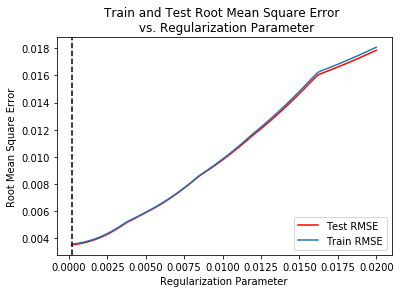

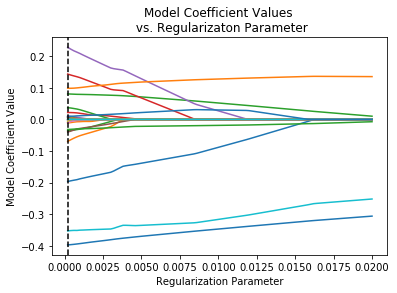

(0.0002, 0.0035262593504606643)


In [26]:
#Above- The metrics for l2 regularized model is same, indicating this one generalizes better as well. Distrib also look more normal.

#Below- l1 (Lasso method or Manhattan norm) limits the sum of absolute values of model coefficients
 #  the loss function = SSE + penality error. Knocking out some weights free of the model altogether (to zero)
 #l1 is a hard constraint, meaning some coefficients are driven exactly to 0 
# Measures distance as if you were traveling on rectangular grid of streets.

def test_regularization_l1(x_train, logy_train, x_test, logy_test, l1):
    train_RMSE = []
    test_RMSE = []
    coefs = []
    for reg in l1:
        lin_mod = linear_model.Lasso(alpha = reg)  #Define l1 regularlized linear reg model w/ Lasso function of scikit-learn package
        lin_mod.fit(x_train, logy_train)
        coefs.append(lin_mod.coef_)
        y_score_train = lin_mod.predict(x_train)
        train_RMSE.append(sklm.mean_squared_error(logy_train, y_score_train))
        y_score = lin_mod.predict(x_test)
        test_RMSE.append(sklm.mean_squared_error(logy_test, y_score))
    min_idx = np.argmin(test_RMSE)
    min_l1 = l1[min_idx]
    min_RMSE = test_RMSE[min_idx]
    
    title = 'Train and Test Root Mean Square Error \n vs. Regularization Parameter'
    plot_regularization(l1, train_RMSE, test_RMSE, coefs, min_l1, title)
    return min_l1, min_RMSE
    
l1 = [x/5000 for x in range(1,101)]  #make grid of 100 regularization values
out_l1 = test_regularization_l1(x_train, logy_train, x_test, logy_test, l1)
print(out_l1) #print x value where test RMSE is at min and what min value is

Mean Square Error      = 0.0035262593504606643
Root Mean Square Error = 0.05938231513220636
Mean Absolute Error    = 0.04529584229275194
Median Absolute Error  = 0.036417221054148685
R^2                    = 0.9704383322663199
Adjusted R^2           = 0.9702778002814427


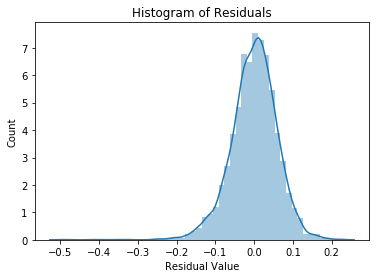

In [30]:
#Above- In top plot, point w/ lowest RMSE is shown w/ dotted line at 0.0002. Min variance dominates bias to left of dotted line
 # & min bias dominates variance to right of dotted line. As bias grows, RMSE also changes dramatically. Some kinks & bends are shown.
 # In bottom plot, there is high variance & bias(regularization penalty) is small to left of dotted line. Variance decreases as 
 # lines cluster & higher bias is introduced tot he right od dotted line. Many coeff driven to 0 as regularization penalty increases.
 # Kinks & bends in RMSE account for coefficients driven to zero

#Below- Evaluate the l1 regression (lasso) model by computing w/ training data and showing results for test data.

lin_mod_l1 = linear_model.Lasso(alpha = out_l1[0])
lin_mod_l1.fit(x_train, logy_train)
y_score_l1 = lin_mod_l1.predict(x_test)

print_metrics2(logy_test, y_score_l1, 28) 
hist_resids2(logy_test, y_score_l1)  
#resid_qq2(logy_test, y_score_l1) 
#resid_plot2(logy_test, y_score_l1) 

In [ ]:
#Above- The metrics for l2 un-regularized model is somewhat better than regularized but l2 is better than l1, but the residuals are closer to unregulated model.

In [34]:
print(logy_test)

[4.47733681 3.8501476  3.8501476  ... 3.98898405 3.80666249 4.15888308]


[88. 47. 47. ... 54. 45. 64.]


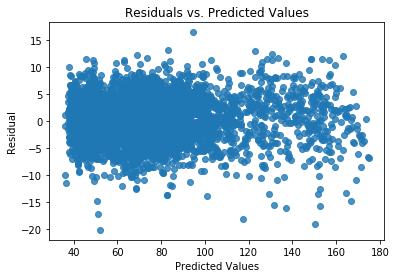

In [33]:
#Above- Fairly constant dispersion w/ noticable positive large residual

#Below- Above plot is for log of prices, need to convert back to normal prices.

y_score_untransform = np.exp(y_score)
y_test_untransform = np.exp(logy_test)
resid_plot2(y_test_untransform, y_score_untransform)
print(y_test_untransform)